In [27]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from collections import Counter
import graphviz

In [2]:
os.chdir("E:/Kaggle_Titanic")

In [3]:
train=pd.read_csv("train.csv")

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [6]:
train['Embarked'].ffill(inplace=True)     # forward fill

In [7]:
train['Male']=(train['Sex']=='male')
train=train.drop(['PassengerId','Name','Fare','Ticket','Cabin','Sex'],axis=1)
train['Male']=train['Male'].map({True:1,False:0})

In [8]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [9]:
train['Embarked']=train['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

In [10]:
train_survived=train[train['Survived']==1]

In [11]:
train_dead=train[train['Survived']==0]

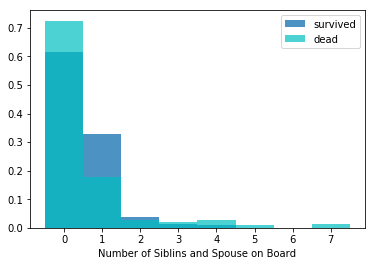

In [12]:
bins=np.linspace(0,8,9)
plt.hist(train_survived['SibSp'],bins,alpha=0.8,label='survived',density=True,align='left')
plt.hist(train_dead['SibSp'],bins,alpha=0.7,label='dead',density=True,color='c',align='left')
plt.legend(loc='upper right')
plt.xlabel("Number of Siblins and Spouse on Board")
plt.show()

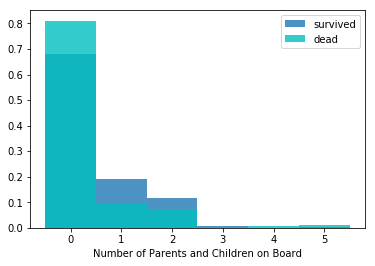

In [13]:
bins=np.linspace(0,6,7)
plt.hist(train_survived['Parch'],bins,alpha=0.8,label='survived',density=True,align='left')
plt.hist(train_dead['Parch'],bins,alpha=0.8,label='dead',density=True,color='c',align='left')
plt.legend(loc='upper right')
plt.xlabel("Number of Parents and Children on Board")
plt.show()

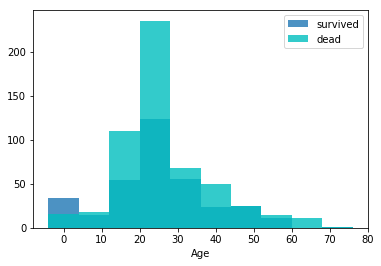

In [14]:
bins=np.linspace(0,80,11)
plt.hist(train_survived['Age'],bins,alpha=0.8,label='survived',align='left')
plt.hist(train_dead['Age'],bins,alpha=0.8,label='dead',color='c',align='left')
plt.legend(loc='upper right')
plt.xlabel("Age")
plt.show()

In [15]:
train=train.values
np.random.shuffle(train)
test=train[:int(0.2*train.shape[0])]
train=train[int(0.2*train.shape[0]):]

In [16]:
train_x=train[:,1:]
train_y=train[:,0]
test_x=test[:,1:]
test_y=test[:,0]

In [82]:
from sklearn.preprocessing import StandardScaler   
scaler = StandardScaler()   
scaler.fit(train_x) 
train_x = scaler.transform(train_x)   
test_x = scaler.transform(test_x) 

Desicion Tree

In [88]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [83]:
parameters = {'min_samples_split':[0.05,0.1,0.15,0.2],'criterion':['gini','entropy']}
clf_DT = GridSearchCV(tree.DecisionTreeClassifier(), parameters,cv=5)
clf_DT.fit(X=train_x, y=train_y)
tree_model = clf_DT.best_estimator_
print (clf_DT.best_score_, clf_DT.best_params_) 

0.8092566619915849 {'criterion': 'entropy', 'min_samples_split': 0.15}


In [86]:
predict_y=clf_DT.predict(test_x)

In [89]:
print("Accuracy of decision tree on test set is: ", accuracy_score(test_y, predict_y)) 

Accuracy of decision tree on test set is:  0.7696629213483146


Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [90]:
Logi=LogisticRegression()

In [91]:
Logi.fit(train_x,train_y)

C:\Users\huimi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [92]:
predict_y_lr=Logi.predict(test_x)

In [101]:
print("Accuracy of logistic regression on test set is: ", accuracy_score(test_y, predict_y_lr)) 

Accuracy of logistic regression on test set is:  0.7865168539325843


Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
parameters = {'min_samples_split':[0.05,0.1,0.15,0.2],'criterion':['gini','entropy'],'n_estimators':[10,20]}
clf_rf = GridSearchCV(RandomForestClassifier(), parameters,cv=5)
clf_rf.fit(X=train_x, y=train_y)
rf_model = clf_rf.best_estimator_
print (clf_rf.best_score_, clf_rf.best_params_) 

0.8288920056100981 {'criterion': 'gini', 'min_samples_split': 0.1, 'n_estimators': 10}


In [95]:
predict_y_rf=rf_model.predict(test_x)

In [100]:
print("Accuracy of random forest on test set is: ", accuracy_score(test_y, predict_y_rf)) 

Accuracy of random forest on test set is:  0.7865168539325843


Support Vector Machine

In [97]:
from sklearn import svm

In [99]:
SVM = svm.LinearSVC()   
SVM.fit(train_x,train_y)   
predict_y_svm=SVM.predict(test_x) 
print("Accuracy of SVM on test set is: ", accuracy_score(test_y, predict_y_svm)) 

Accuracy of SVM on test set is:  0.797752808988764
